In [1]:
from itertools import combinations

import pandas as pd
import sklearn

In [2]:
recipes_data_df = pd.read_csv('out/recipes_data.csv')

In [3]:
recipes_data_df.head()

,title,year
0,terrina de melón con gelée de oporto,1987
1,mousse de trufa negra '87,1987
2,"ensalada de pasta fresca con caviar, tempura d...",1987
3,"raviolis de cigala, patatas y trufa negra",1987
4,tempura de flor de calabacín rellena de mozzar...,1987


In [4]:
recipes_ml_df = pd.read_csv('out/recipes_ml.csv')

In [5]:
recipes_ml_df.head()

,num_ingredients,num_preparations,num_styles,num_techniques,num_techniquesR,num_worlds,i_chocolate troceado,i_pizza,i_jugo de trufa negra,i_fresitas liofilizadas,...,temp_CALIENTE/FRÍA,temp_HELADA/FRÍA,temp_TIBIA/CALIENTE,temp_FRÍA/HELADA,temp_CALIENTE/HELADA,temp_TIBIA,temp_HELADA/FRÍA/AMBIENTE,temp_TIBIA/AMBIENTE,w_DULCE,w_SALADO
0,7,4,1,17,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,15,5,0,22,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
2,21,5,0,29,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,30,10,1,56,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,25,7,1,37,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
def my_combinations(xs):
    for n in range(1, len(xs) + 1):
        for comb in combinations(xs, n):
            yield comb

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
ex=['num_ingredients', 'num_preparations', 'num_styles', 'num_techniques', 'num_techniquesR', 'num_worlds']

In [12]:
X=recipes_ml_df[ex]

In [56]:
X=recipes_ml_df

In [74]:
[c for c in recipes_ml_df.columns]

['num_ingredients',
 'num_preparations',
 'num_styles',
 'num_techniques',
 'num_techniquesR',
 'num_worlds',
 'i_chocolate troceado',
 'i_pizza',
 'i_jugo de trufa negra',
 'i_fresitas liofilizadas',
 'i_espuma caliente de azafrán',
 'i_leche de almendra amarga',
 'i_gelatina de manzana',
 'i_erizos de mar',
 'i_huevas de trucha',
 'i_raíz',
 'i_avellana frita',
 'i_anchoa en aceite',
 'i_mantequilla negra',
 'i_piel de pollo',
 'i_crema espesa de pistacho verde',
 'i_morillas',
 'i_mermelada de tomate',
 'i_piel de limón semiconfitada',
 'i_ventresca de atún',
 'i_gelatina de fresas',
 'i_almendra en polvo',
 'i_cogollos de shiso morado',
 'i_crêpe',
 'i_rúcula',
 'i_cabrito',
 'i_leche de almendras',
 'i_nata semimontada',
 'i_coco amargo',
 'i_piel de haba escaldada',
 'i_hielo',
 'i_wasabi fresco',
 'i_ventresca de caballa',
 'i_mangostanes',
 'i_consomé de pollo',
 'i_grasa de panceta ibérica',
 'i_sorbete de almendra',
 'i_diente de león',
 'i_alcaparras en sal',
 'i_n|2o',
 'i_

In [57]:
y = list(range(1, 1215))

In [58]:
len(X)

1214

In [59]:
len(y)

1214

In [60]:
lm = LinearRegression()
model = lm.fit(X,y)

In [68]:
predictions = lm.predict(X)
print(predictions[:2000])

[  1.00000000e+00   2.00000000e+00   3.00000000e+00 ...,   1.21200000e+03
   1.21300000e+03   1.21400000e+03]


In [77]:
lm.score(X,y)

1.0

In [78]:
lm.coef_

array([  1.73974315,   4.5435062 ,  28.40762668, ..., -19.15864843,
        13.96797718, -10.85119357])

In [81]:
for c in lm.coef_:
    if abs(c) < 0.1:
        print(c)

0.0371182241965
0.0307235130628
-0.048047840256
-0.0480478402568
-0.0480478402568
0.0594259376725
-0.049725794188
0.0145919475362


In [79]:
lm.intercept_

607.80449410016922

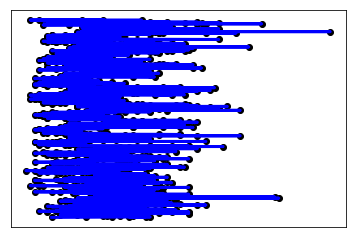

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X.num_ingredients, y,  color='black')
plt.plot(X.num_ingredients, y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()